# **Predicción de la calidad y potabilidad del agua**

### **Introducción**

Según la Organización Mundial de la Salud, el acceso al agua potable es considerado un derecho humano básico y por lo tanto es una política clave a la hora de hablar de la protección de la salud de las personas en todos los niveles gubernamentales.
Según el CAA (Código Alimentario Argentino), se entiende por agua potable a la que es apta para la alimentación y uso doméstico: no deberá contener substancias o cuerpos extraños de origen biológico, orgánico, inorgánico o radiactivo en tenores tales que la hagan peligrosa para la salud. A continuación se detallan los parámetros para los que se tienen datos y su límite legal segun el CAA. Serán la guía a la hora de evaluar los datos para poder entrenar el modelo.

**pH:** 6,5 - 8,5; pH sat.: pH ± 0,2. Es una medida de acidez o alcalinidad de una disolución acuosa.
**Color:** máx 5
**Turbidity:** (Turbiedad) máx 3 N T U
**Odor:** (Olor) sin olores extraños.
**Conductivity:** (Conductividad)
**Total Dissolved Solids** (Sólidos disueltos en el agua)
**Source** (Fuente de agua de donde se toma la muestra)
**Water Temperature:** (Temperatura del agua)
**Air Temperature:** (Temperatura del aire)
**Month:** (Mes de la toma de muestra)
**Day:** (Día de la toma de muestra)
**Time of Day**: (Hora de la toma de muestra)
**Target:** (Objetivo – Potabilidad) 0 significa potable y 1 significa no potable.

**Iron:** (Hierro)
**Nitrate:** (Nitratos)
**Chloride:** (Cloruro (Cl-)) máx 350 mg/L
**Lead:** (Plomo)
**Zinc:** (Cinc (Zn)) máx 5,0 mg/L
**Fluoride:** (Fluoruro)
**Copper:** (Cobre (Cu)) máx 1,00 mg/L
**Sulfate:** (Sulfato)
**Chlorine:** (Cloro residual)
**Manganese:** (Manganeso)

**Objetivo**

Entrenar un modelo para que pueda predecir si un cuerpo de agua es apto para consumo humano en base a algunos parámetros de los cuerpos de agua.

**Hipotesis**

Se podrá encontrar relación entre variables para poder crear un modelo de predicción de potabilidad de agua.

**Preguntas a contestar**

1) ¿Se pueden descartar variables a partir del EDA?
2) ¿Existen relación entre alguna de las variables para poder aplicar un modelo de regresión lineal?

**Contexto comercial**

El acceso al agua potable en ciertos lugares del mundo es extremadamente dificil, asi como también que empresas u organizaciones hagan llegar agua potable desde las ciudades. Entonces si nos encontramos con agua en un estado natural, con ayuda de la determinación de ciertos parámetros (a determinar), poder asegurar la potabilidad de un cuerpo de agua.

**Problema comercial**

La pregunta a responder sería: 
¿Existen patrones dentro de las instancias de parámetros para el agua que puedan definir si ésta es potable o no?

**Contexto analítico**

Para determinar esto se cuenta con un paquete de 3000 instancias de datos, con mas de 15 caracteristicas, que a su vez estan etiquetadas como potable o no. Se busca generar un modelo de aprendizaje supervisado que pueda predecir la potabilidad del agua.

### **1. Importamos librerías necesarias y el dataset**

In [74]:
# Tratamiento de datos
import pandas                  as pd
import numpy                   as np
import statsmodels.api         as sm
import scipy.stats             as stats

# Visualizaciones
import matplotlib.pyplot       as plt
import plotly.express          as px
import seaborn                 as sns

# Análisis de datos y modelos
from   sklearn                 import metrics
from   sklearn.metrics         import classification_report
from   sklearn.metrics         import accuracy_score
from   sklearn.preprocessing   import LabelEncoder
from   sklearn.model_selection import train_test_split
from   scipy.stats             import chi2_contingency
from   sklearn.model_selection import cross_val_score

from   sklearn.decomposition   import PCA
from   sklearn.pipeline        import make_pipeline
from   sklearn.preprocessing   import StandardScaler
from   sklearn.preprocessing   import scale

from   sklearn.neighbors       import KNeighborsClassifier
from   sklearn.linear_model    import LogisticRegression
from   sklearn.ensemble        import RandomForestRegressor

from   sklearn.model_selection import StratifiedKFold
from   sklearn.model_selection import GridSearchCV

# Métricas de validación
from   sklearn.metrics         import r2_score
from   sklearn.metrics         import mean_squared_error
from   sklearn.metrics         import mean_absolute_error
from   sklearn.metrics         import mean_absolute_percentage_error
from   sklearn.metrics         import median_absolute_error
from   sklearn.metrics         import max_error

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Dataset

df = pd.read_csv('../Datasets/raw/5 water_parameters_aleatorio.csv')
df.index=df.Index
df=df.drop(columns='Index')
df.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
338067,5.433578,7.529314e-09,8.518680,NaN,1.083030e-50,2.122687,Faint Yellow,1.434635,1.243640,0.029971,...,3.740346,NaN,293.942914,Reservoir,24.609394,61.375180,January,24.0,7.0,1
863700,7.738720,5.018566e-04,9.090027,224.071930,4.206920e-38,0.288449,Faint Yellow,0.181374,0.312302,0.137376,...,3.315754,0.001251,187.610967,Reservoir,13.014033,33.363682,October,1.0,0.0,0
785112,6.839512,4.250018e-03,4.793592,115.195326,2.693954e-164,2.582472,Colorless,0.907715,0.769216,0.480114,...,2.724244,0.024792,49.375377,River,26.357940,61.844718,July,15.0,17.0,0
113151,6.755584,2.540646e-02,7.700586,113.064534,3.786846e-117,2.868333,Colorless,0.683428,0.383682,0.225414,...,3.552762,0.010048,304.207035,Aquifer,18.708350,61.392421,June,15.0,16.0,0
666031,6.538577,3.750677e-03,9.263498,201.215250,4.334831e-81,0.140280,Faint Yellow,3.665254,0.860020,0.869272,...,4.329042,8.690193,544.900152,Aquifer,9.412400,77.236264,September,8.0,1.0,1


### **2. Limpieza de datos**



In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3099 entries, 338067 to 700862
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pH                      3029 non-null   float64
 1   Iron                    3072 non-null   float64
 2   Nitrate                 3035 non-null   float64
 3   Chloride                2983 non-null   float64
 4   Lead                    3093 non-null   float64
 5   Zinc                    3014 non-null   float64
 6   Color                   3094 non-null   object 
 7   Turbidity               3066 non-null   float64
 8   Fluoride                3011 non-null   float64
 9   Copper                  2991 non-null   float64
 10  Odor                    3012 non-null   float64
 11  Sulfate                 2989 non-null   float64
 12  Conductivity            3016 non-null   float64
 13  Chlorine                3071 non-null   float64
 14  Manganese               3037 non-

In [77]:
df.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,3029.000000,3.072000e+03,3035.000000,2983.000000,3.093000e+03,3014.000000,3.066000e+03,3011.000000,2991.000000,3012.000000,2989.000000,3016.000000,3071.000000,3.037000e+03,3099.000000,3006.000000,3070.000000,3035.000000,3038.000000,3099.000000
mean,7.455000,1.191481e-01,6.063903,183.095294,1.904474e-03,1.565950,5.105639e-01,0.916319,0.496303,1.779093,145.536624,420.545659,3.247571,9.576322e-02,263.266487,19.037870,60.020766,15.759473,11.551020,0.245240
std,0.858083,4.504179e-01,3.194691,67.008701,4.925314e-02,1.505932,9.135351e-01,0.787068,0.557316,1.054413,67.197837,190.874337,0.730739,3.899778e-01,155.818287,11.438599,18.129009,8.877739,6.902625,0.430299
min,3.705960,1.155747e-39,0.760654,53.056085,0.000000e+00,0.000155,6.906908e-09,0.004274,0.000012,0.014010,23.529250,48.513507,1.319789,6.225794e-26,0.031325,2.058036,-7.046584,1.000000,0.000000,0.000000
25%,6.910700,1.141283e-05,3.942997,137.417021,4.632275e-122,0.449661,3.686601e-02,0.348962,0.130272,0.901396,98.196498,281.317762,2.752499,1.532161e-06,126.956562,11.273826,47.327804,8.000000,6.000000,0.000000
50%,7.450957,2.775409e-03,5.495051,174.849459,1.975009e-62,1.109762,2.073482e-01,0.739111,0.330342,1.770848,135.439201,394.108228,3.218208,5.695062e-04,257.370077,16.546514,60.083273,16.000000,12.000000,0.000000
75%,8.004003,5.053163e-02,7.489327,215.569821,5.474297e-27,2.277579,5.936268e-01,1.264584,0.687857,2.604575,180.953066,527.306456,3.673923,1.512069e-02,398.071089,23.689621,72.379729,24.000000,18.000000,0.000000
max,11.105917,7.240115e+00,36.880909,859.941737,2.283156e+00,11.893509,9.925832e+00,8.665271,7.517820,4.135653,775.625797,1489.592103,8.018571,8.690193e+00,578.731502,117.569622,121.620748,31.000000,23.000000,1.000000


In [78]:
# Analiza y muestra la cantidad de valores nulos que contiene cada categoría

df.isnull().sum()

pH                         70
Iron                       27
Nitrate                    64
Chloride                  116
Lead                        6
Zinc                       85
Color                       5
Turbidity                  33
Fluoride                   88
Copper                    108
Odor                       87
Sulfate                   110
Conductivity               83
Chlorine                   28
Manganese                  62
Total Dissolved Solids      0
Source                     44
Water Temperature          93
Air Temperature            29
Month                      35
Day                        64
Time of Day                61
Target                      0
dtype: int64

In [79]:
# Completamos los datos nulos de las variables numericas con el valor de la mediana, 
# y controlamos que no queden valores nulos ni duplicados.

col_inter= ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids',
       'Water Temperature', 'Air Temperature', 'Day', 'Time of Day']
for i in col_inter:
  df[i] = df[i].fillna(df[i].median())
df.isnull().sum()

pH                         0
Iron                       0
Nitrate                    0
Chloride                   0
Lead                       0
Zinc                       0
Color                      5
Turbidity                  0
Fluoride                   0
Copper                     0
Odor                       0
Sulfate                    0
Conductivity               0
Chlorine                   0
Manganese                  0
Total Dissolved Solids     0
Source                    44
Water Temperature          0
Air Temperature            0
Month                     35
Day                        0
Time of Day                0
Target                     0
dtype: int64

Las variables que quedan con valores nulos, son las variables categóricas.

### **3. Ingeniería de atributos**

En esta parte analizaremos las variables categóricas "Color", "Source" y "Month" para obtener más información de los datos y para saber si podemos precindir de ellas o directamente eliminaremos las filas con nulos y conservaremos el atributo.

In [80]:
df= df.drop_duplicates()

print(df.shape)

(3098, 23)


In [81]:
def get_num_cat_cols(df):
    
    num_cls = [x for x in df.columns if df[x].dtype != 'object']
    cat_cls = [x for x in df.columns if x not in num_cls]

    print(f'Numerical columns \n',num_cls)
    print(f'Categorical columns \n',cat_cls)
    
    return num_cls, cat_cls

num_cols, cat_cols = get_num_cat_cols(df)

Numerical columns 
 ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Water Temperature', 'Air Temperature', 'Day', 'Time of Day', 'Target']
Categorical columns 
 ['Color', 'Source', 'Month']


In [82]:
for c in cat_cols:
    print('-'*100)
    print(f'Column Name - {c}')
    print('-'*100)
    print(df[c].value_counts())

----------------------------------------------------------------------------------------------------
Column Name - Color
----------------------------------------------------------------------------------------------------
Near Colorless    968
Colorless         929
Faint Yellow      581
Light Yellow      368
Yellow            247
Name: Color, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - Source
----------------------------------------------------------------------------------------------------
Ground       420
Stream       408
Aquifer      397
Reservoir    391
Well         376
Spring       361
River        353
Lake         348
Name: Source, dtype: int64
----------------------------------------------------------------------------------------------------
Column Name - Month
----------------------------------------------------------------------------------------------------
May          290
August       280


Column name - Color
p value is 6.046839252038818e-59
Both variables are Dependent (reject H0)


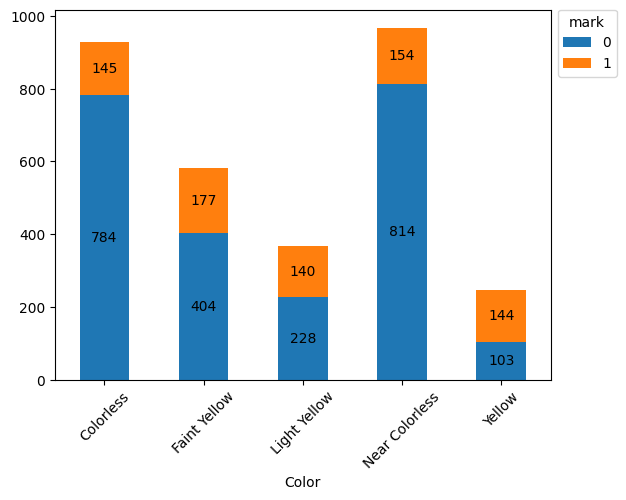

Column name - Source
p value is 0.7191646499560108
Both variables are Independent (H0 holds true)


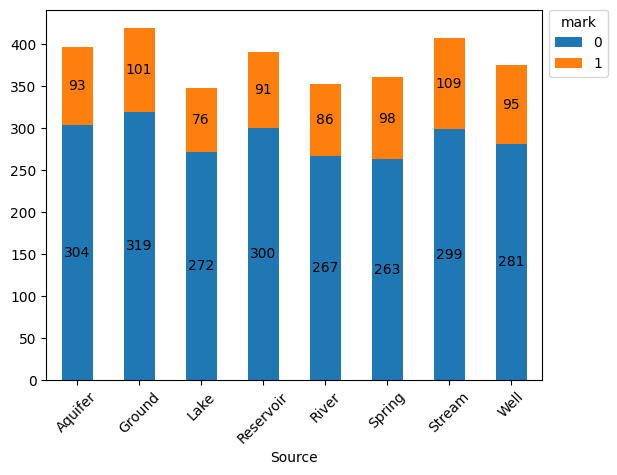

Column name - Month
p value is 0.4549837296020083
Both variables are Independent (H0 holds true)


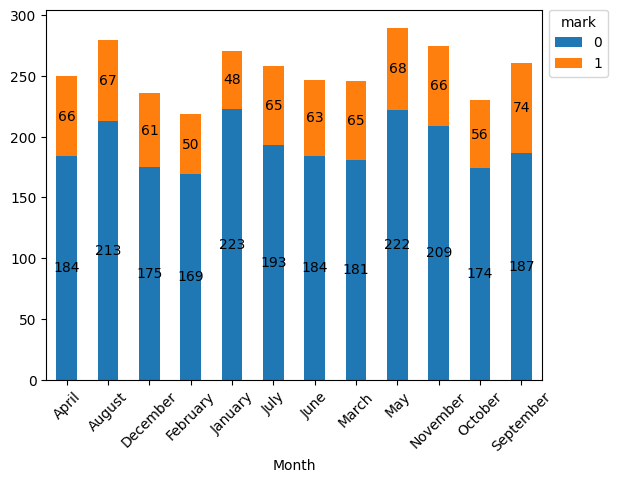

In [83]:
def chi_sq_test(ct):
    stat, p, dof, expected = chi2_contingency(ct)

    alpha = 0.05 # definimos el p valor
    print("p value is " + str(p))
    if p <= alpha:
        print('Both variables are Dependent (reject H0)')
    else:
        print('Both variables are Independent (H0 holds true)')

def cat_col_test(df, cat_colname, target_colname):
    
    print(f"Column name - {cat_colname}")
    ct = pd.crosstab(df[cat_colname],df[target_colname])
    chi_sq_test(ct)
    ax = ct.plot(kind='bar',stacked=True, rot = 45)
    ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    plt.show()

for c in cat_cols:
    cat_col_test(df, c, 'Target')

<AxesSubplot: xlabel='Color', ylabel='pH'>

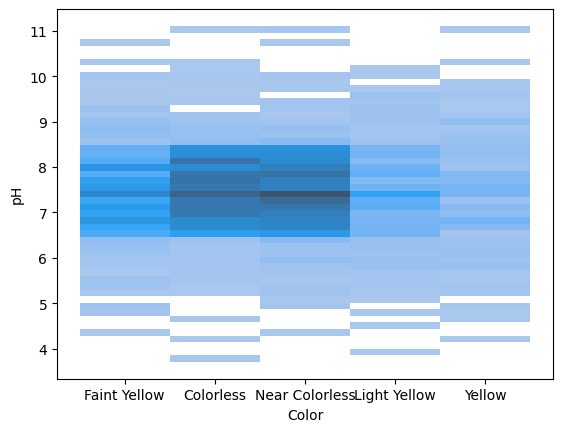

In [84]:
sns.histplot(data=df, x='Color', y='pH')

In [85]:
df = df.dropna()
df.isnull().sum() 

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Source                    0
Water Temperature         0
Air Temperature           0
Month                     0
Day                       0
Time of Day               0
Target                    0
dtype: int64

Analizando el p-valor, se define al color como una variable dependiente con el valor objetivo. Podemos ver que existe una tendencia a que mientras más clara sea el agua, (colorless, near colorless) hay más valores en el rango de pH neutro. En referencia a la fuente, es bastante similar para cualquiera y resulta independiente del valor objetivo. El parámetro de color es una variable a tener en cuenta. El resto puede descartarse.

In [86]:
df=df.drop(columns='Month')
df=df.drop(columns='Source')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 338067 to 700862
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pH                      3016 non-null   float64
 1   Iron                    3016 non-null   float64
 2   Nitrate                 3016 non-null   float64
 3   Chloride                3016 non-null   float64
 4   Lead                    3016 non-null   float64
 5   Zinc                    3016 non-null   float64
 6   Color                   3016 non-null   object 
 7   Turbidity               3016 non-null   float64
 8   Fluoride                3016 non-null   float64
 9   Copper                  3016 non-null   float64
 10  Odor                    3016 non-null   float64
 11  Sulfate                 3016 non-null   float64
 12  Conductivity            3016 non-null   float64
 13  Chlorine                3016 non-null   float64
 14  Manganese               3016 non-

In [87]:
# Convertimos las variables categoricas en variables númericas, utilizando Label Encoder.

encoder = LabelEncoder()
for c in df.columns[1:]:  
    if(df[c].dtype=='object'): 
        df[c] = encoder.fit_transform(df[c])
    else: 
        df[c] = df[c]

df['Color'] = df['Color'].astype(float)
#df['Target'] = df['Target'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 338067 to 700862
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pH                      3016 non-null   float64
 1   Iron                    3016 non-null   float64
 2   Nitrate                 3016 non-null   float64
 3   Chloride                3016 non-null   float64
 4   Lead                    3016 non-null   float64
 5   Zinc                    3016 non-null   float64
 6   Color                   3016 non-null   float64
 7   Turbidity               3016 non-null   float64
 8   Fluoride                3016 non-null   float64
 9   Copper                  3016 non-null   float64
 10  Odor                    3016 non-null   float64
 11  Sulfate                 3016 non-null   float64
 12  Conductivity            3016 non-null   float64
 13  Chlorine                3016 non-null   float64
 14  Manganese               3016 non-

### **4. Tratamiento de outliers mediante método IQR**

Primero graficaremos un boxplot para cada variable para observar cuantos valoers atipicos tienen las variables. Luego haremos un IQR para reemplazar esas variables atipicos por los limites de los cuartiles para no sesgar los datos.  

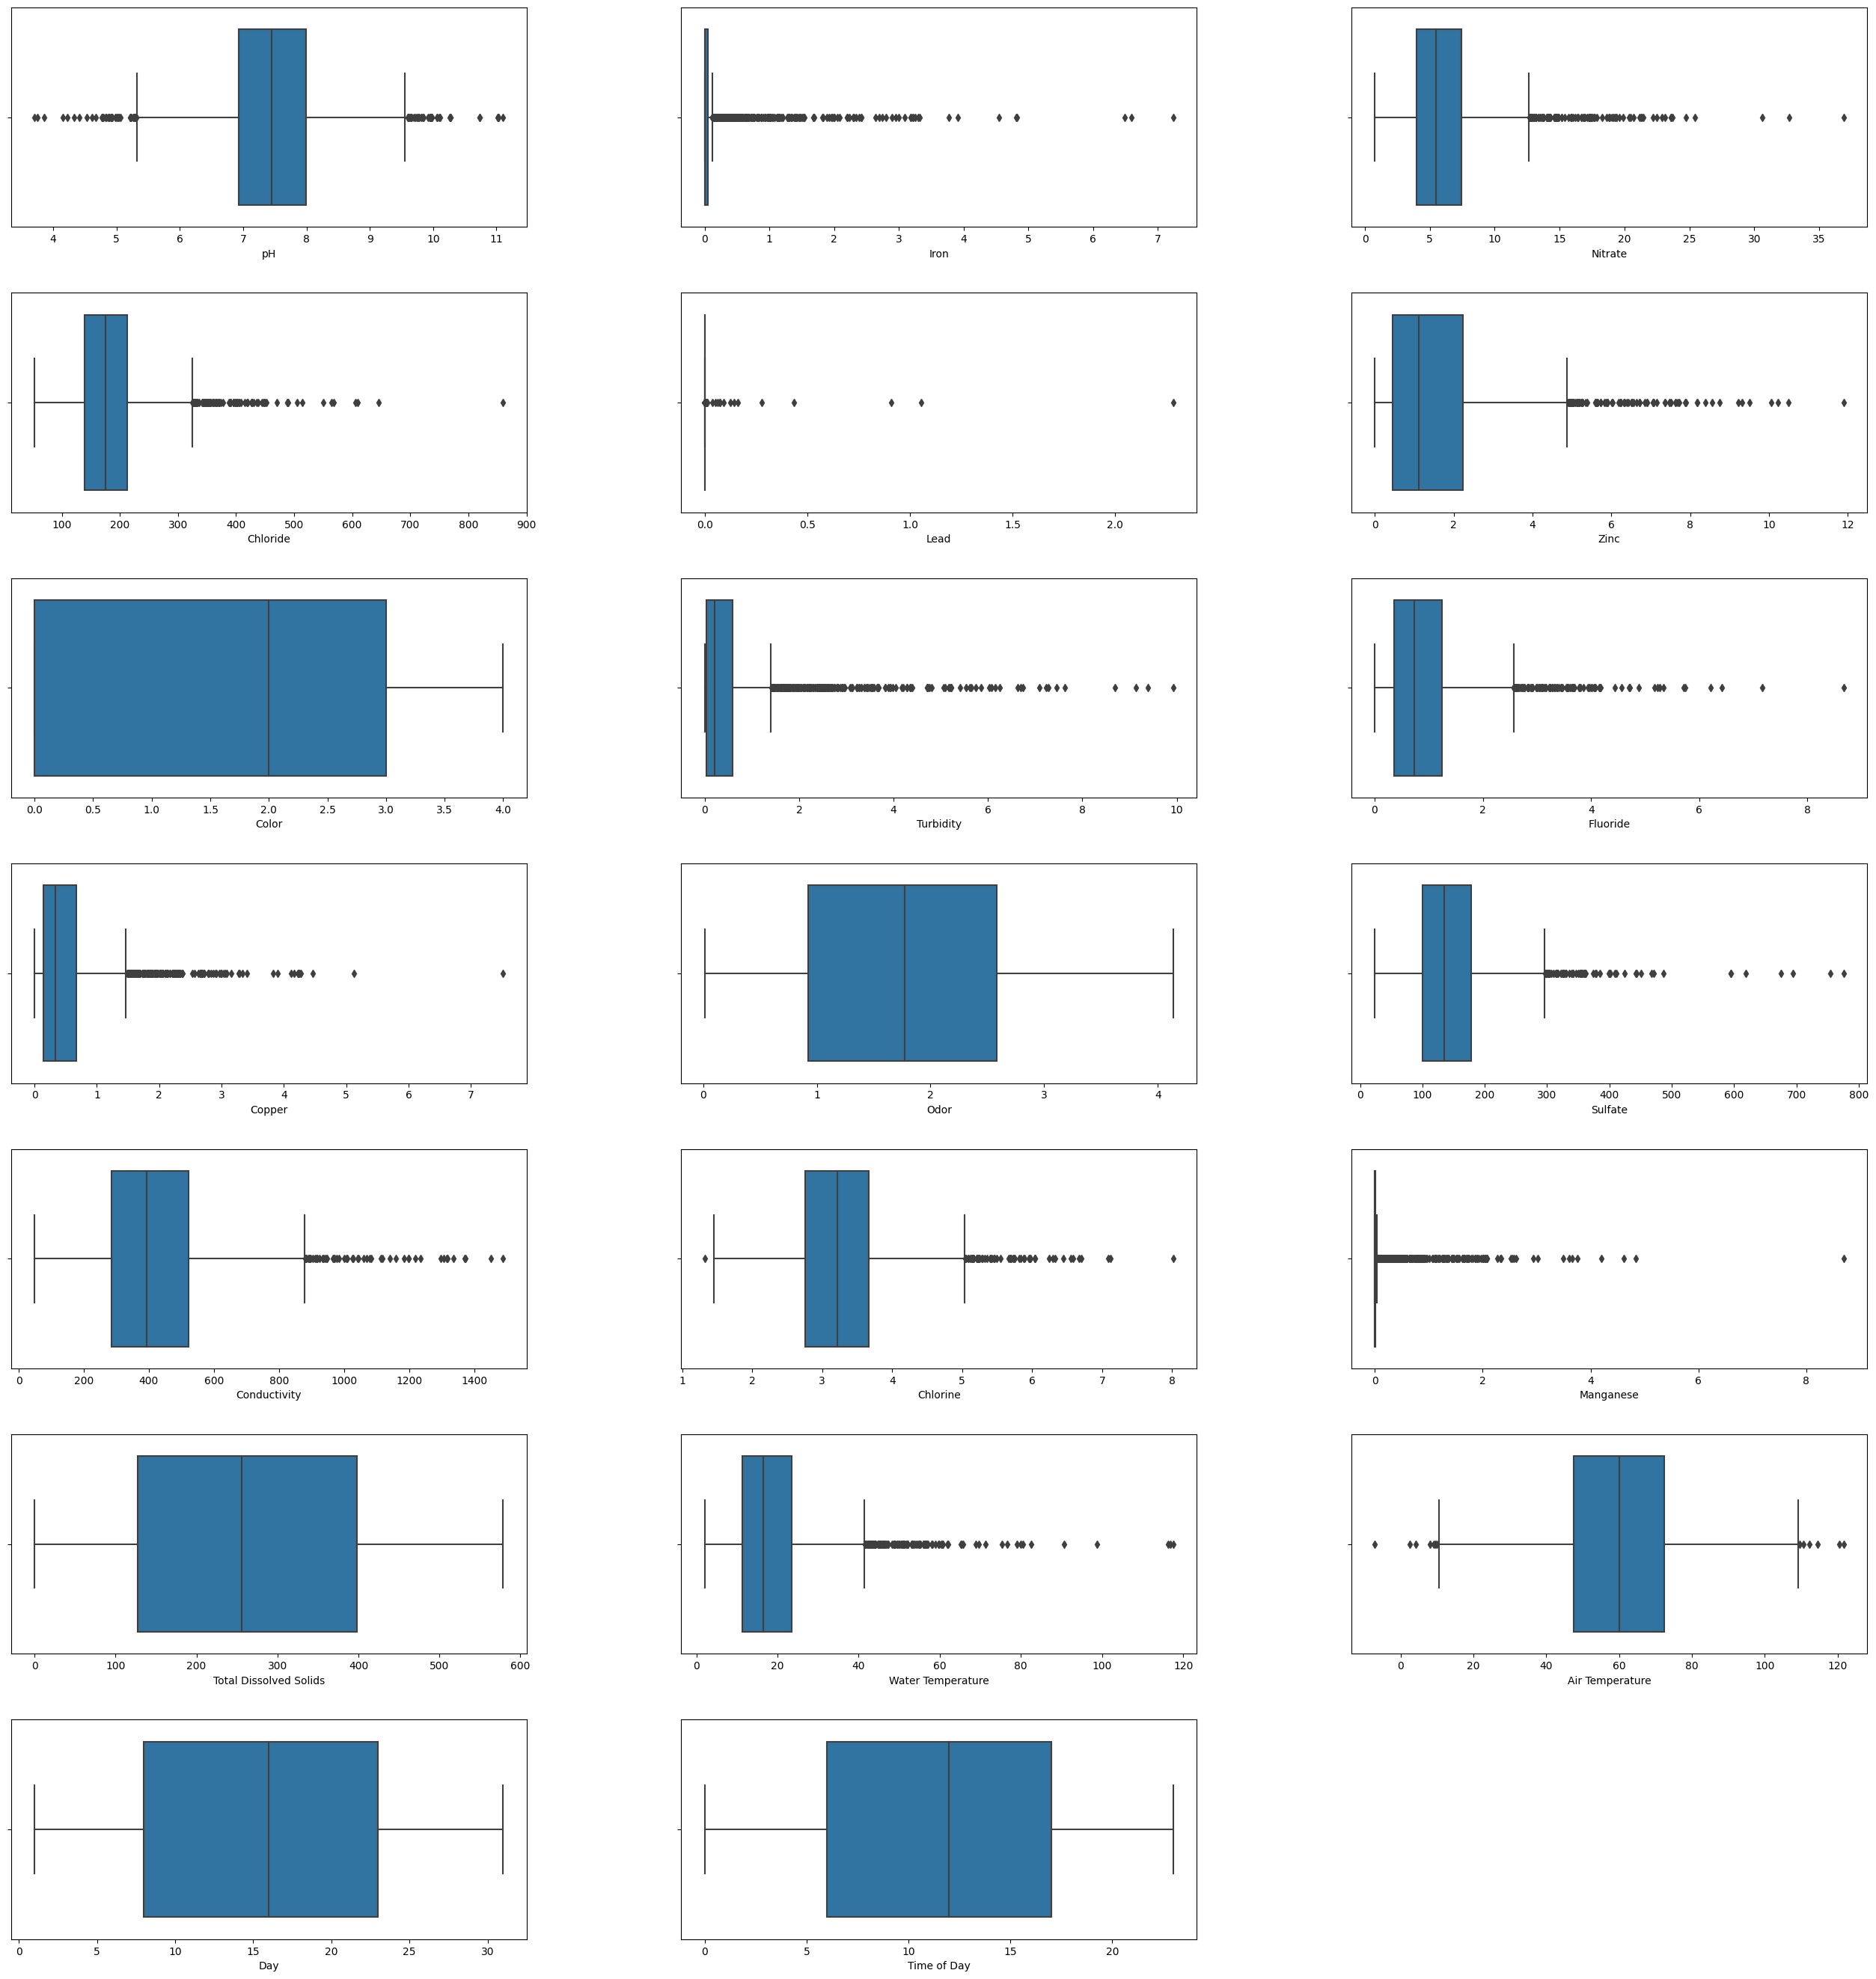

In [88]:
df_plot = df.drop(columns='Target')

fig = plt.figure(figsize=[32,46])
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.3, wspace=0.3);
for i ,col in enumerate(df_plot):  
    ax1 = fig.add_subplot(10,3, i+1);
    ax1 = sns.boxplot(data=df, x=col);
    ax1.set_xlabel(f'{col}')

In [89]:
# Encontramos el Q1, Q3, y el rango intercuartílico para cada columna

def clean(data):
    for col in data.columns:
        if data[col].dtype != int:
            median = np.median(data[col])
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            fence_low = Q1 - 1.5 * IQR
            fence_high = Q3 + 1.5 * IQR
            data.loc[data[col] > fence_high, col] = fence_high
            data.loc[data[col] < fence_low, col]  = fence_low
        else:
            break
    return data

In [90]:
clean_df = clean(df)

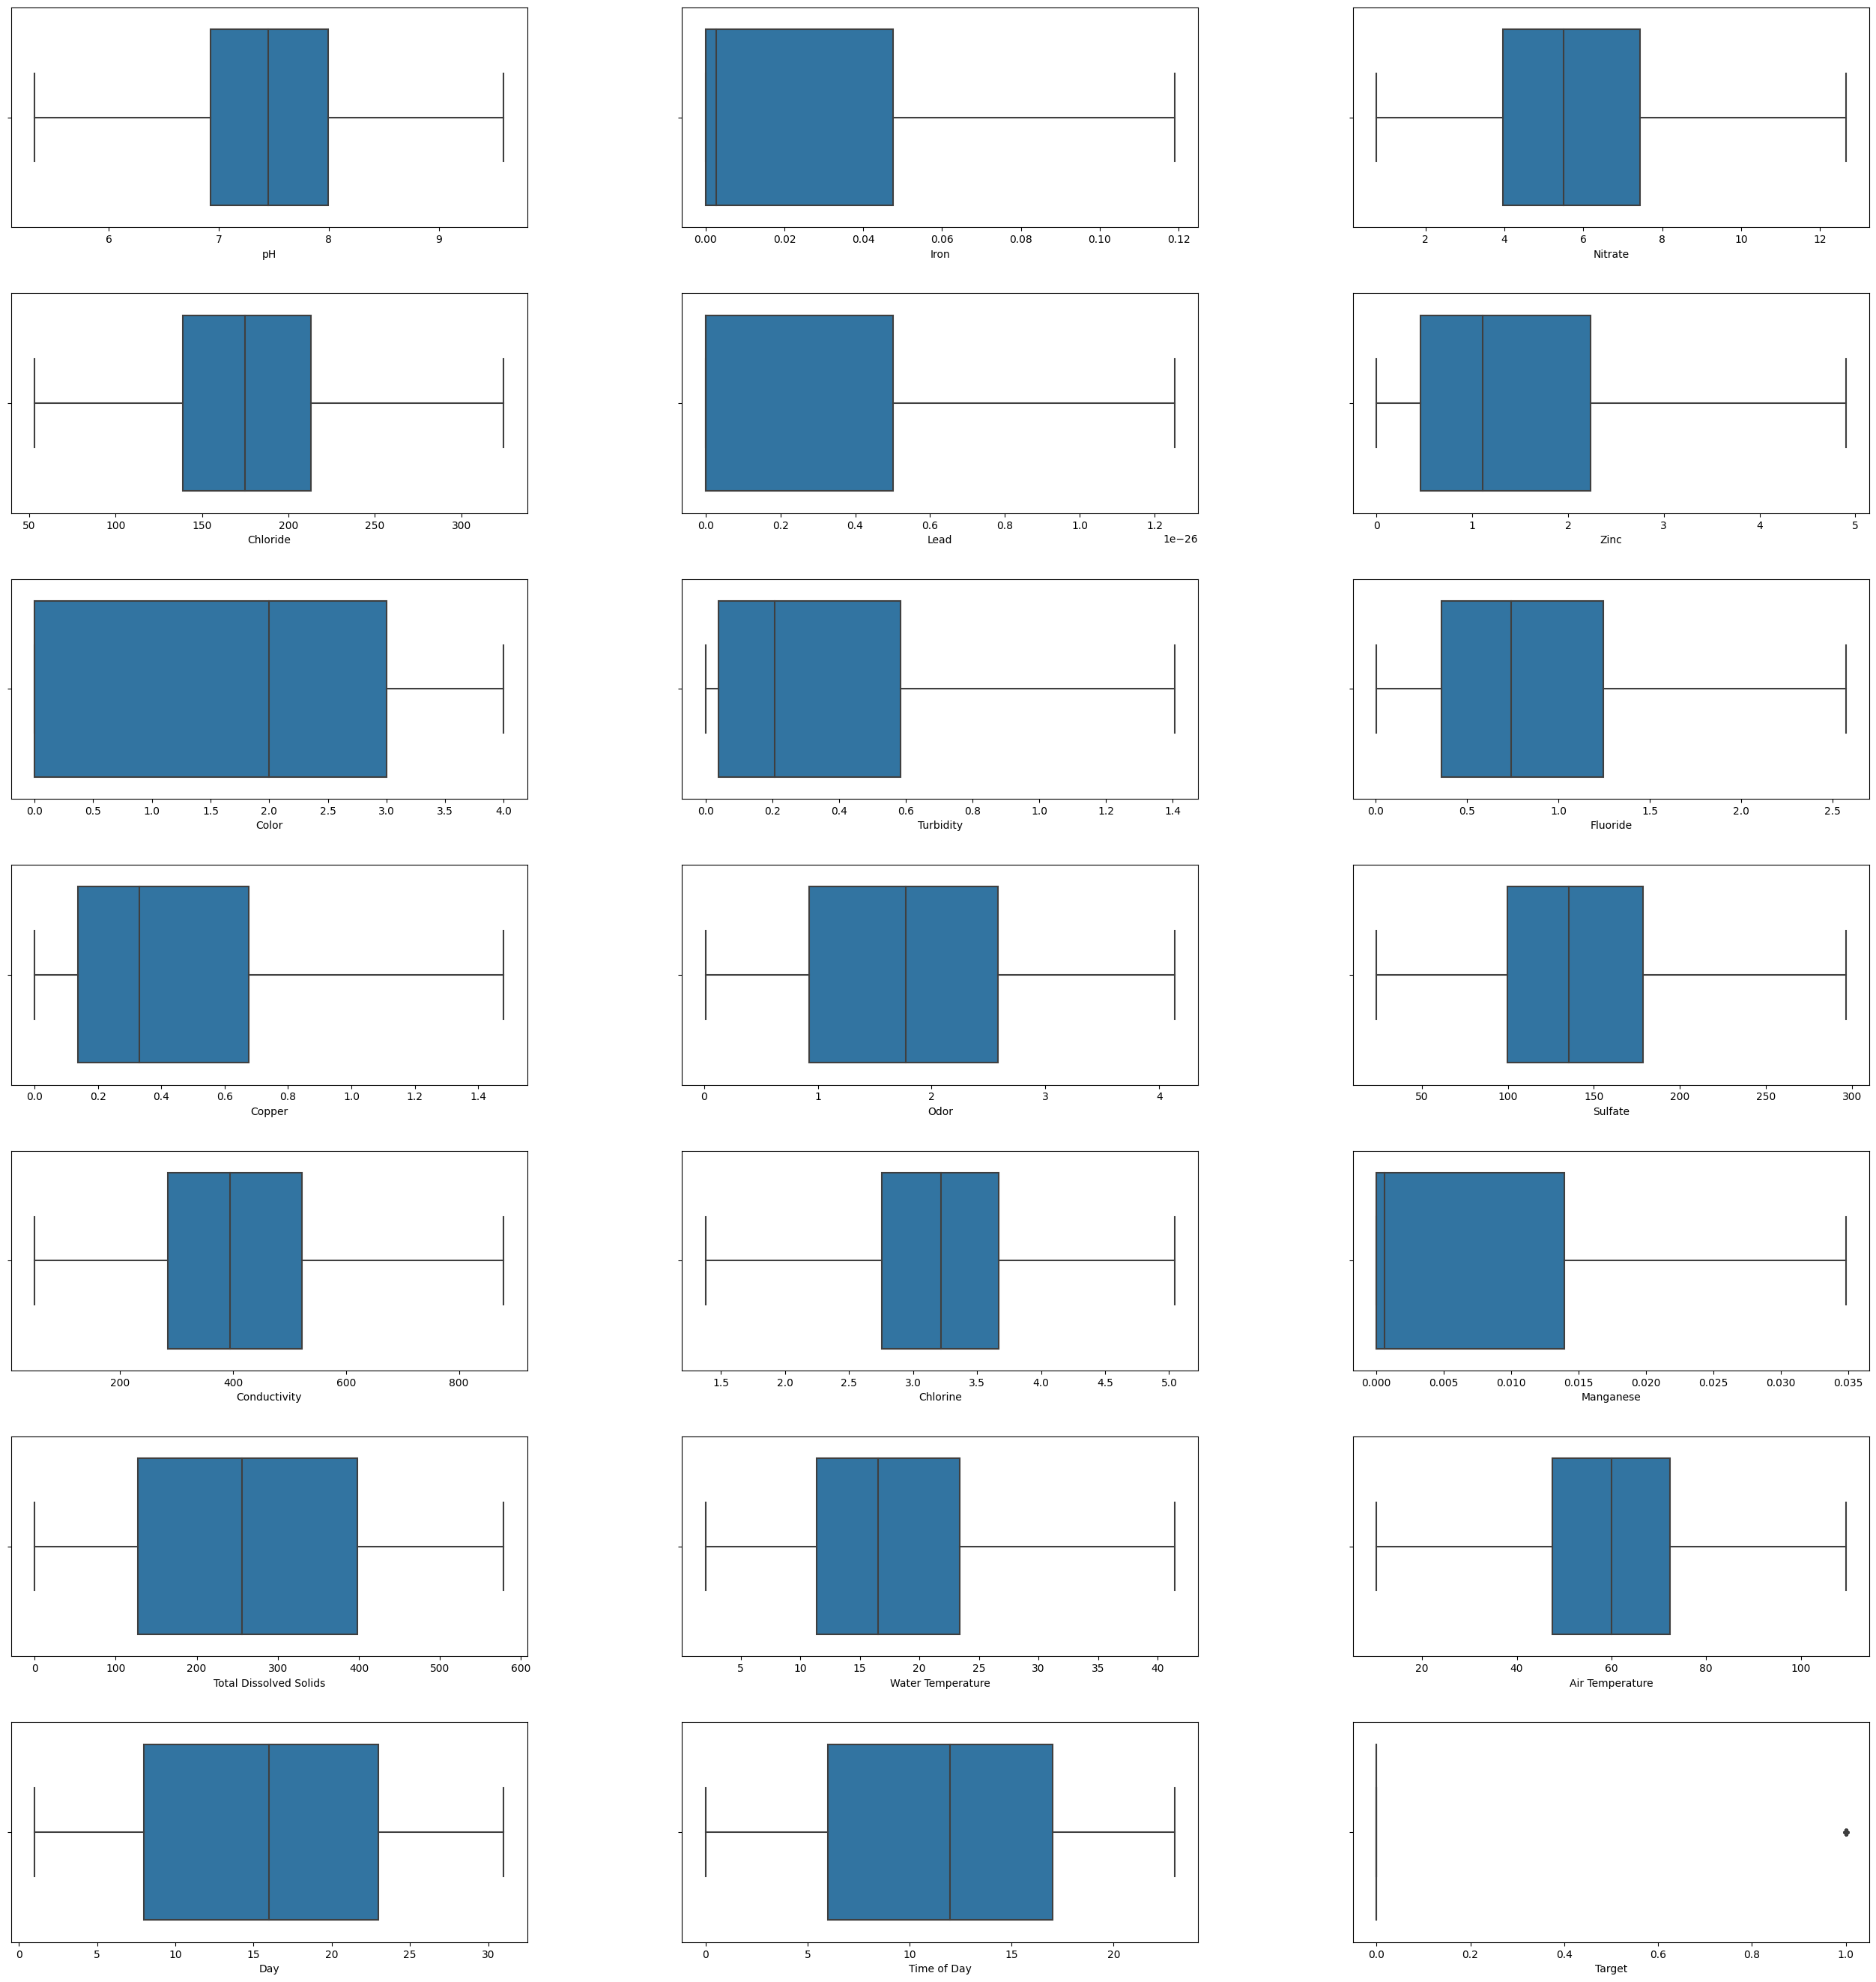

In [91]:
df_plot = clean_df

fig = plt.figure(figsize=[32,46])
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.3, wspace=0.3);
for i ,col in enumerate(df_plot):  
    ax1 = fig.add_subplot(10,3, i+1);
    ax1 = sns.boxplot(data=df, x=col);
    ax1.set_xlabel(f'{col}')

### **5. Storytelling y análisis exploratorio de datos**

Analizaremos ahora las variables numericas para encontrar relaciones entre ellas y poder definir mediante un metodo de forward selection cuales son las variables mas importantes.

Retomamos las preguntas que nos hicimos al principio:
1) ¿Se pueden descartar variables a partir del EDA?
2) ¿Existen relación entre alguna de las variables para poder aplicar un modelo de regresión lineal?

Para encontrar respuesta a estas preguntas, primero debemos hacer un análisis exploratorio donde vamos a generar un heatmap buscando las 10 mejores relaciones entre variables.
La categoria target, muestra si el agua de esa instancia es potable o no. 0 significa potable y 1 significa no potable.

In [92]:
df = clean_df

Tenemos un desbalance en el valor target claro, vamos a hacer un oversampling para equilibrar estos.

In [93]:
# Conteo de clases
class_count_0, class_count_1 = df['Target'].value_counts()
# Separar clases
class_0 = df[df['Target'] == 0]
class_1 = df[df['Target'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2277, 21)
class 1: (739, 21)


total de clase 1 y 0: 1    2277
0    2277
Name: Target, dtype: int64


<AxesSubplot: title={'center': 'Target balanceado'}>

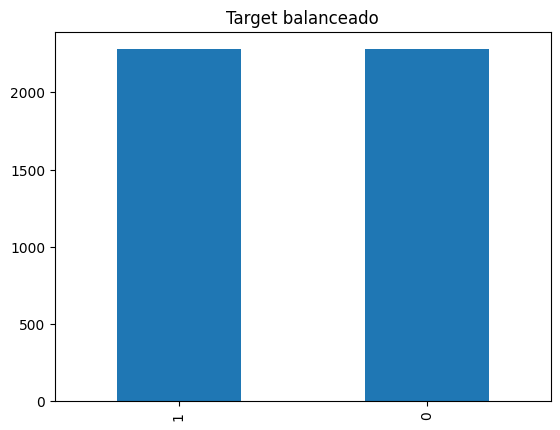

In [94]:
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)
print("total de clase 1 y 0:",test_over['Target'].value_counts())
test_over['Target'].value_counts().plot(kind='bar', title='Target balanceado')

In [95]:
a = round(df['Target'].value_counts()/len(df['Target']),2)
print(a) 

0    0.75
1    0.25
Name: Target, dtype: float64


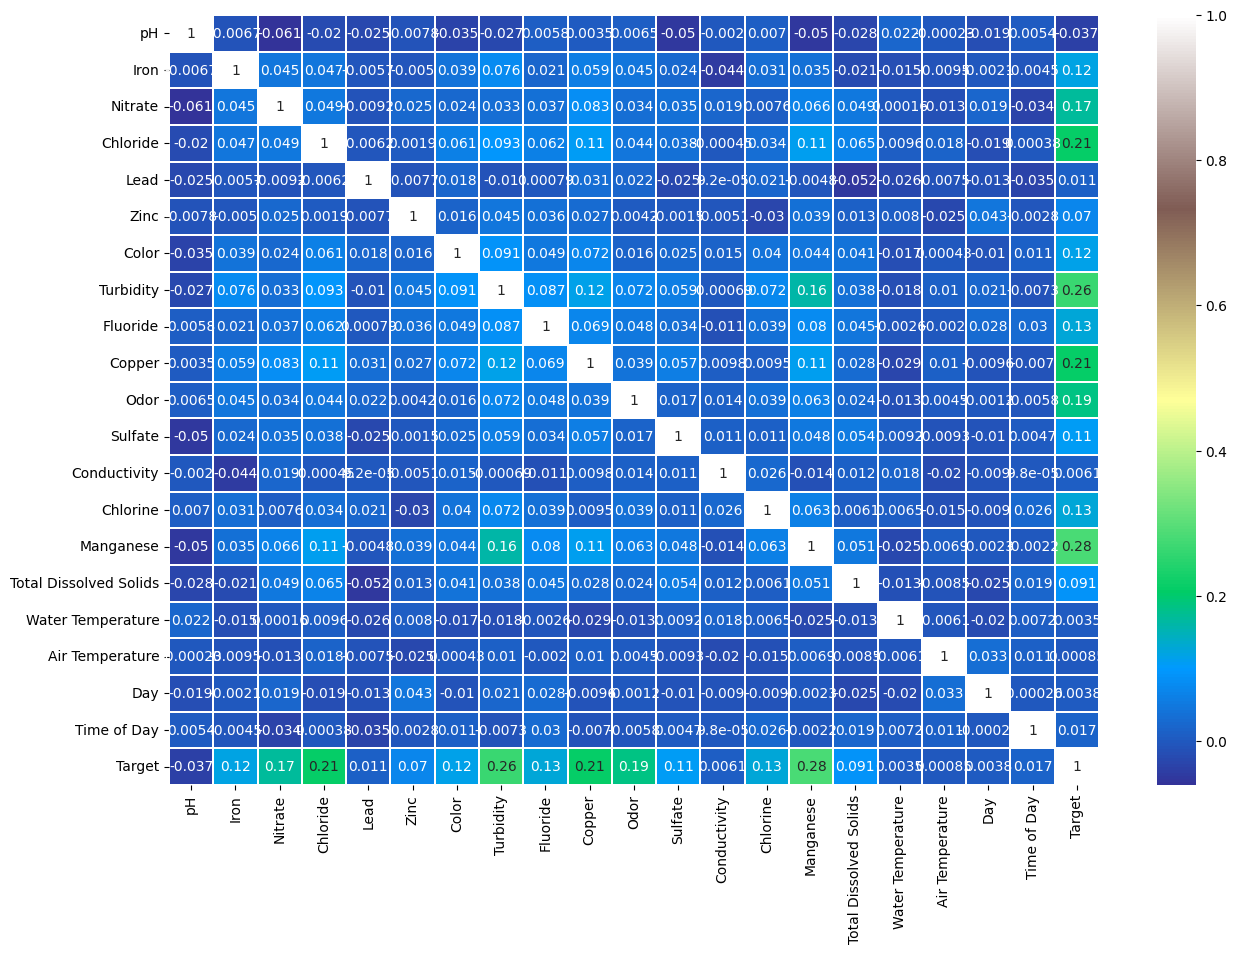

In [96]:
# Generamos un heatmap para poder observar que variables presentan correlación.

sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

In [97]:
# Obtenemos el Top 10 de las correlaciones más grandes dentro del heatmap

def parejas(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def correlaciones(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = parejas(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Correlaciones mas grandes")
print(correlaciones(df,10))

Correlaciones mas grandes
Manganese  Target       0.282620
Turbidity  Target       0.263916
Copper     Target       0.211705
Chloride   Target       0.209734
Odor       Target       0.187229
Nitrate    Target       0.170483
Turbidity  Manganese    0.159199
Fluoride   Target       0.128515
Chlorine   Target       0.128100
Iron       Target       0.120670
dtype: float64


 Con estas variables en mente podríamos descartar el resto y quedarnos con las que aparecen en la lista. Vamos a generar graficos de dispersión para poder apreciar estas relaciones.

<AxesSubplot: xlabel='pH', ylabel='Turbidity'>

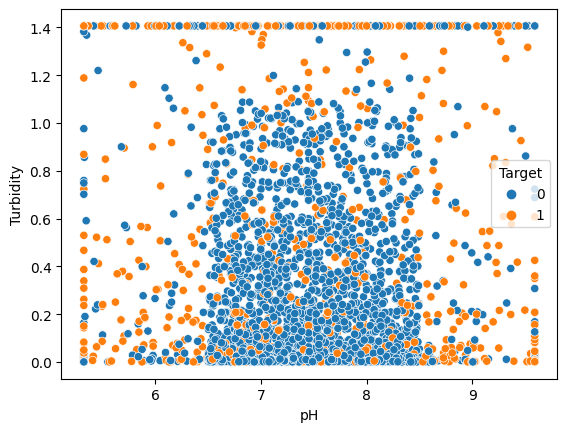

In [98]:
# Turbiedad vs pH
sns.scatterplot(data=df, x="pH", y="Turbidity", hue="Target")

<AxesSubplot: xlabel='pH', ylabel='Manganese'>

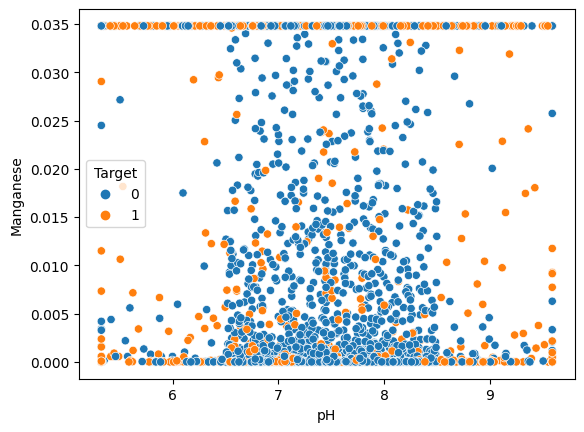

In [99]:
# Manganeso vs pH
sns.scatterplot(data=df, x="pH", y="Manganese", hue="Target")

<AxesSubplot: xlabel='pH', ylabel='Copper'>

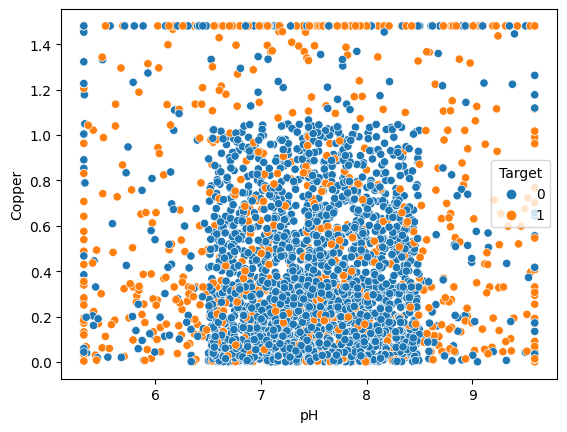

In [100]:
# Cobre vs pH
sns.scatterplot(data=df, x="pH", y="Copper", hue="Target")

<AxesSubplot: xlabel='pH', ylabel='Chlorine'>

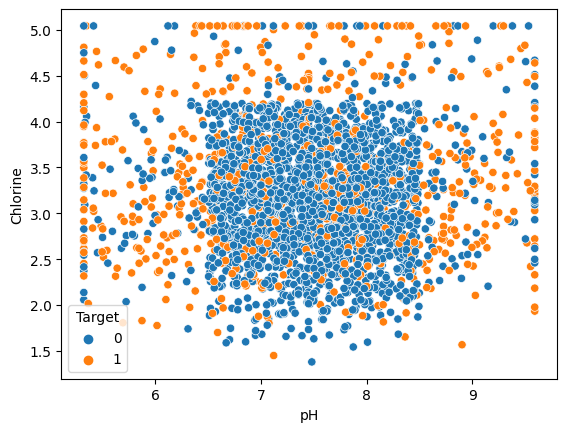

In [101]:
# Cloro residual vs pH
sns.scatterplot(data=df, x="pH", y="Chlorine", hue="Target")

Graficamos las 4 variables de mayor relación con el valor de Target, todas en función del pH. Si bien el pH no aparece con relación aparente, sabemos que es de vital importancia y un parámetro clave para determinar la potabilidad del agua. Este debe estar entre un valor de 6.5 y 8.5, lo cual podemos apreciar que para todos los parámetros graficados, la mayor parte de los valores potables (Target=0) aparecen en ese rango y para cada parámetro por debajo de su valor límite, lo cual lo considera apto para el consumo.

Hasta aquí se pueden responder a ambas preguntas:
1) ¿Se pueden descartar variables a partir del EDA?
Si, se pueden descartar variables con poca o nula relación, a su vez también variables que no influyen, como el tipo de fuente de donde proviene, o la epoca del año. Son factores que no deberian afectar a las caracteristicas intrinsecas del agua que refieren a su potabilidad.

2) ¿Existen relación entre alguna de las variables para poder aplicar un modelo de regresión lineal?
Existe relación entre las variables, con la variable objetivo. Para poder responder si se puede aplicar un modelo de regresión lineal se debe aplicar desarrollado en el apartado siguiente. Se aplicará un modelo de forward selection para comparar que variables rescata este modelo y si el conjunto es similar a las que tienen mayores correlaciones con target.

In [102]:
X = df.drop("Target", axis=1)       # feature matrix
y = df['Target']                    # target feature


def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = [] 
    while (len(initial_features)>0): 
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min() 
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin()) 
        else:
            break 
    return best_features

forward_selection(X,y)

['Lead',
 'Manganese',
 'Turbidity',
 'Chloride',
 'Odor',
 'Copper',
 'Nitrate',
 'Chlorine',
 'Iron',
 'Sulfate',
 'Fluoride',
 'Color',
 'Zinc',
 'Total Dissolved Solids']

### **6. Entrenamiento de modelos de ML**

Entre el modelo de forward selection y las relaciones encontradas al final del apartado anterior, creamos un dataframe con las variables que más prometen para poder aplicar los modelos de machine learning.
Luego dividimos al DF en tres grupos, uno para entrenar, otro para testear y uno para validar el metodo mas adelante.

In [103]:
df = df[['Target', 'pH', 'Turbidity', 'Manganese', 'Copper', 'Chloride', 'Iron', 'Odor', 'Nitrate', 'Fluoride', 'Chlorine', 'Sulfate', 'Zinc', 'Color']]
X = df.drop("Target", axis=1)       # feature matrix
y = df['Target']                    # target feature

X_train , X1 , y_train , y1 = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_test , X_cv , y_test , y_cv = train_test_split(X1, y1, test_size = 0.25, random_state = 42)

In [104]:
#Algoritmo de clasificación: Modelo del vecino más cercano y validación simple

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
model_knn = knn.fit(X_train, y_train)
y_predKNN = knn.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_predKNN)
accuracy = metrics.accuracy_score(y_test, y_predKNN)

print(metrics.classification_report(y_test, y_predKNN))
print('Matriz de confusión: [TN FP FN TP]', confusion.ravel())
print('Presición es:', accuracy)
print('R2 es:', r2_score(y_true = y_test, y_pred = y_predKNN))
print('MSE es:', mean_squared_error(y_true = y_test, y_pred = y_predKNN))
print('RMSE es:', np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_predKNN)))
print('MAE es:', mean_absolute_error(y_true = y_test, y_pred = y_predKNN))
print('MAPE es:', mean_absolute_percentage_error(y_true = y_test, y_pred = y_predKNN))
print('MedAE es:', median_absolute_error(y_true = y_test, y_pred = y_predKNN))
print('MaxError es:', max_error(y_true = y_test, y_pred = y_predKNN))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       330
           1       0.41      0.25      0.31       123

    accuracy                           0.70       453
   macro avg       0.58      0.56      0.56       453
weighted avg       0.66      0.70      0.67       453

Matriz de confusión: [TN FP FN TP] [286  44  92  31]
Presición es: 0.6997792494481236
R2 es: -0.5178122690317817
MSE es: 0.30022075055187636
RMSE es: 0.547924037209426
MAE es: 0.30022075055187636
MAPE es: 437435725395809.94
MedAE es: 0.0
MaxError es: 1


In [105]:
# Algoritmo de regresión: Modelo de regresión logística y validación simple

LR = LogisticRegression(max_iter=10000, n_jobs=-1)
LR.fit(X_train, y_train) 
y_predLR = LR.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_predLR)
accuracy = metrics.accuracy_score(y_test, y_predLR)

print(metrics.classification_report(y_test, y_predLR))
print('Matriz de confusión: [TN FP FN TP]', confusion.ravel())
print('Presición es:', accuracy)
print('R2 es:', r2_score(y_true = y_test, y_pred = y_predLR))
print('MSE es:', mean_squared_error(y_true = y_test, y_pred = y_predLR))
print('RMSE es:', np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_predLR)))
print('MAE es:', mean_absolute_error(y_true = y_test, y_pred = y_predLR))
print('MAPE es:', mean_absolute_percentage_error(y_true = y_test, y_pred = y_predLR))
print('MedAE es:', median_absolute_error(y_true = y_test, y_pred = y_predLR))
print('MaxError es:', max_error(y_true = y_test, y_pred = y_predLR))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       330
           1       0.59      0.33      0.42       123

    accuracy                           0.75       453
   macro avg       0.69      0.62      0.63       453
weighted avg       0.73      0.75      0.73       453

Matriz de confusión: [TN FP FN TP] [301  29  82  41]
Presición es: 0.7549668874172185
R2 es: -0.23880266075388068
MSE es: 0.24503311258278146
RMSE es: 0.49500819446023464
MAE es: 0.24503311258278146
MAPE es: 288309909919965.7
MedAE es: 0.0
MaxError es: 1


Podemos comentar que el modelo de regresion logaritmica es mas preciso que el modelo de clasificación para predecir la potabilidad del agua antes que su no potabilidad. 
Sin embargo este ultimo modelo ajusta mejor los valores.
Se realizará un metodo de validación cruzada para poder tomar una desición sobre los modelos.

In [134]:
params_grid = {'n_neighbors': [1, 30]}

In [135]:
knn_val = cross_val_score(knn, X_cv, y_cv, cv=5)
print('Accuracy: %.3f (%.3f)' % (knn_val.mean(), knn_val.std()))

Accuracy: 0.808 (0.040)


In [136]:
grid_cv = GridSearchCV(knn, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)
print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores Parametros {'n_neighbors': 30}
Mejor CV score 0.7922885572139302
Accuracy del modelo = 0.74614


In [150]:
params_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

In [151]:
LR_val = cross_val_score(LR, X_cv, y_cv, cv=5)
print('Accuracy: %.3f (%.3f)' % (LR_val.mean(), LR_val.std()))

Accuracy: 0.795 (0.025)


In [152]:
grid_cv = GridSearchCV(LR, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)
print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores Parametros {'C': 10}
Mejor CV score 0.8043117744610283
Accuracy del modelo = 0.75055


In [140]:
#Algoritmo de clasificación: Modelo del vecino más cercano y validación simple

knn = KNeighborsClassifier(n_neighbors=30, metric='minkowski')
model_knn = knn.fit(X_train, y_train)
y_predKNN = knn.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_predKNN)
accuracy = metrics.accuracy_score(y_test, y_predKNN)

print(metrics.classification_report(y_test, y_predKNN))
print('Matriz de confusión: [TN FP FN TP]', confusion.ravel())
print('Presición es:', accuracy)
print('R2 es:', r2_score(y_true = y_test, y_pred = y_predKNN))
print('MSE es:', mean_squared_error(y_true = y_test, y_pred = y_predKNN))
print('RMSE es:', np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_predKNN)))
print('MAE es:', mean_absolute_error(y_true = y_test, y_pred = y_predKNN))
print('MAPE es:', mean_absolute_percentage_error(y_true = y_test, y_pred = y_predKNN))
print('MedAE es:', median_absolute_error(y_true = y_test, y_pred = y_predKNN))
print('MaxError es:', max_error(y_true = y_test, y_pred = y_predKNN))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       330
           1       0.57      0.25      0.35       123

    accuracy                           0.75       453
   macro avg       0.67      0.59      0.60       453
weighted avg       0.72      0.75      0.71       453

Matriz de confusión: [TN FP FN TP] [307  23  92  31]
Presición es: 0.7461368653421634
R2 es: -0.28344419807834487
MSE es: 0.25386313465783666
RMSE es: 0.5038483250521298
MAE es: 0.25386313465783666
MAPE es: 228659583729628.03
MedAE es: 0.0
MaxError es: 1


In [153]:
# Algoritmo de regresión: Modelo de regresión logística y validación simple

LR = LogisticRegression(max_iter=10000, n_jobs=-1, C=10)
LR.fit(X_train, y_train) 
y_predLR = LR.predict(X_test)

confusion = metrics.confusion_matrix(y_test, y_predLR)
accuracy = metrics.accuracy_score(y_test, y_predLR)

print(metrics.classification_report(y_test, y_predLR))
print('Matriz de confusión: [TN FP FN TP]', confusion.ravel())
print('Presición es:', accuracy)
print('R2 es:', r2_score(y_true = y_test, y_pred = y_predLR))
print('MSE es:', mean_squared_error(y_true = y_test, y_pred = y_predLR))
print('RMSE es:', np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_predLR)))
print('MAE es:', mean_absolute_error(y_true = y_test, y_pred = y_predLR))
print('MAPE es:', mean_absolute_percentage_error(y_true = y_test, y_pred = y_predLR))
print('MedAE es:', median_absolute_error(y_true = y_test, y_pred = y_predLR))
print('MaxError es:', max_error(y_true = y_test, y_pred = y_predLR))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       330
           1       0.58      0.30      0.40       123

    accuracy                           0.75       453
   macro avg       0.68      0.61      0.62       453
weighted avg       0.72      0.75      0.72       453

Matriz de confusión: [TN FP FN TP] [303  27  86  37]
Presición es: 0.7505518763796909
R2 es: -0.2611234294161129
MSE es: 0.24944812362030905
RMSE es: 0.4994478187161388
MAE es: 0.24944812362030905
MAPE es: 268426467856519.78
MedAE es: 0.0
MaxError es: 1


## Conclusiones finales

Usando un dataset de parametros del agua, en primera instancia se hace una limpieza y un wrangling de datos para eliminar ruido de los datos. Luego mediante una ingenieria de atributos se analizan las variables categoricas y finalmente con el metodo IQR se reemplazan los outliers de cada parametro por la mediana. 
Se utiliza un metodo de forward selection y un heatmap para determinar los parametros que tienen mayores relaciones, se limpia finalmente el dataset y nos quedamos con las variables que más peso tienen para poder entrenar a los modelos.
Se ponen a prueba dos modelos, un modelo de clasificación del vecino más cercano y un modelo de regresión logistica. En un primer fit, el modelo de regresión tiene una mayor presición. Se hace una validación con metricas simples y ambos modelos se encuentran parejos. Se hace entonces una validación cruzada y un hipertuning de parametros para intentar mejorar la performance de los modelos y ver si uno es mejor que el otro. Se puede observar luego de esto que el modelo del vecino más cercano es mas preciso para determinar la potabilidad del agua que la no potabilidad, pero sus valores son mejores que los de la regresión logistica. Se define que el modelo de clasificación es el modelo más indicado finalmente.